In [2]:
# Only run this once
import os
os.chdir('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [4]:
res_rh = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_RH.csv')
res_lh = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_LH.csv')
res_l = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_L.csv')

res_rh_detailed = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_RH_detailed.csv')
res_lh_detailed = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_LH_detailed.csv')
res_l_detailed = pd.read_csv('./results/HFD_Linear_SVM_PP_PNP_L_detailed.csv')

In [5]:
tr = [('stdev' in json.loads(p_details)[0]) for p_details in res_rh_detailed['Details']]
print(len(res_rh_detailed))

res_rh_detailed.loc[tr]

6


,Processing Method,Classifier,Dataset,Overall accuracy,Sensitivity,Specificity,Average accuracy per fold,Patients correct ratio,Channels,Hyperparameters,Notes,Details
2,HFD,Linear SVM,PP/PNP-RH,0.776670,0.779245,0.773784,0.770237,0.842105,['PO3'],0.20,"{""window start"": 0, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
3,HFD,Linear SVM,PP/PNP-RH,0.768694,0.747170,0.792812,0.771141,0.842105,"['CP6', 'C2']",0.70,"{""window start"": 1, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
4,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
5,HFD,Linear SVM,PP/PNP-RH,0.810568,0.894340,0.716702,0.807031,0.842105,['CP2'],0.40,"{""window start"": 3, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."


In [6]:
def get_max_accuracy_experiment(df):
    max_index = df['Overall accuracy'].idxmax()
    return df.loc[max_index]

In [7]:
def get_all_for_window_start(start, df):
    return df.where(df['Notes'] == "{\"window start\": " + str(start) + ", \"window size\": 2, \"k\": 7}").dropna(how='all')


In [8]:
def get_all_with_details(df):
    has_details = [('stdev' in json.loads(p_details)[0]) for p_details in df['Details']]
    return df.loc[has_details]

In [9]:
res_rh_detailed[res_rh_detailed['Notes'] == "{\"window start\": " + str(2) + ", \"window size\": 2, \"k\": 7}"]

,Processing Method,Classifier,Dataset,Overall accuracy,Sensitivity,Specificity,Average accuracy per fold,Patients correct ratio,Channels,Hyperparameters,Notes,Details
0,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
1,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
4,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."


In [10]:
[res_rh_detailed['Notes'] == "{\"window start\": " + str(2) + ", \"window size\": 2, \"k\": 7}"]

[0     True
 1     True
 2    False
 3    False
 4     True
 5    False
 Name: Notes, dtype: bool]

In [11]:
get_max_accuracy_experiment(get_all_for_window_start(3, res_l_detailed))

Processing Method                                                          HFD
Classifier                                                          Linear SVM
Dataset                                                               PP/PNP-L
Overall accuracy                                                         0.842
Sensitivity                                                           0.958333
Specificity                                                           0.711864
Average accuracy per fold                                             0.830213
Patients correct ratio                                                0.894737
Channels                                                                ['F2']
Hyperparameters                                                            0.5
Notes                            {"window start": 3, "window size": 2, "k": 7}
Details                      [{"true label": 1, "predicted probabilities": ...
Name: 1, dtype: object

In [12]:
get_all_for_window_start(3, res_l)


,Processing Method,Classifier,Dataset,Overall accuracy,Sensitivity,Specificity,Average accuracy per fold,Patients correct ratio,Channels,Hyperparameters,Notes,Details
12872,HFD,Linear SVM,PP/PNP-L,0.554,0.640152,0.457627,0.539210,0.526316,['Cz'],0.1,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
12873,HFD,Linear SVM,PP/PNP-L,0.434,0.619318,0.226695,0.427095,0.421053,['C1'],0.1,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
12874,HFD,Linear SVM,PP/PNP-L,0.610,0.501894,0.730932,0.612266,0.736842,['C2'],0.1,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
12875,HFD,Linear SVM,PP/PNP-L,0.476,0.231061,0.750000,0.490715,0.526316,['C3'],0.1,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
12876,HFD,Linear SVM,PP/PNP-L,0.431,0.626894,0.211864,0.419062,0.421053,['C4'],0.1,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16965,HFD,Linear SVM,PP/PNP-L,0.281,0.285985,0.275424,0.295260,0.263158,"['PO3', 'PO8']",0.8,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
16966,HFD,Linear SVM,PP/PNP-L,0.359,0.462121,0.243644,0.370972,0.263158,"['PO3', 'Oz']",0.8,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
16967,HFD,Linear SVM,PP/PNP-L,0.407,0.492424,0.311441,0.402495,0.315789,"['PO3', 'O1']",0.8,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN
16968,HFD,Linear SVM,PP/PNP-L,0.486,0.617424,0.338983,0.493568,0.421053,"['PO3', 'O2']",0.8,"{""window start"": 3, ""window size"": 2, ""k"": 7}",NaN


In [13]:
res_rh_detailed

,Processing Method,Classifier,Dataset,Overall accuracy,Sensitivity,Specificity,Average accuracy per fold,Patients correct ratio,Channels,Hyperparameters,Notes,Details
0,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
1,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
2,HFD,Linear SVM,PP/PNP-RH,0.776670,0.779245,0.773784,0.770237,0.842105,['PO3'],0.20,"{""window start"": 0, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
3,HFD,Linear SVM,PP/PNP-RH,0.768694,0.747170,0.792812,0.771141,0.842105,"['CP6', 'C2']",0.70,"{""window start"": 1, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
4,HFD,Linear SVM,PP/PNP-RH,0.828514,0.871698,0.780127,0.828133,0.842105,['F2'],0.15,"{""window start"": 2, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."
5,HFD,Linear SVM,PP/PNP-RH,0.810568,0.894340,0.716702,0.807031,0.842105,['CP2'],0.40,"{""window start"": 3, ""window size"": 2, ""k"": 7}","[{""true label"": 1, ""predicted probabilities"": ..."


In [14]:
max_accs_rh = pd.DataFrame([get_max_accuracy_experiment(get_all_for_window_start(i, res_rh_detailed)) for i in range(4)])
max_accs_lh = pd.DataFrame([get_max_accuracy_experiment(get_all_for_window_start(i, res_lh_detailed)) for i in range(4)])
max_accs_l = pd.DataFrame([get_max_accuracy_experiment(get_all_for_window_start(i, res_l_detailed)) for i in range(4)])

In [15]:
max_accs_rh = pd.DataFrame([get_max_accuracy_experiment(get_all_with_details(get_all_for_window_start(i, res_rh_detailed))) for i in range(4)])
max_accs_lh = pd.DataFrame([get_max_accuracy_experiment(get_all_with_details(get_all_for_window_start(i, res_lh_detailed))) for i in range(4)])
max_accs_l = pd.DataFrame([get_max_accuracy_experiment(get_all_with_details(get_all_for_window_start(i, res_l_detailed))) for i in range(4)])

In [34]:
json.loads(max_accs_l.iloc[3]['Details'])[5]['stdev']

0.07086413299395063

In [45]:
n_windows = 4

std_avgs_rh = [np.average([p_details['stdev'] for p_details in json.loads(max_accs_rh['Details'].values[i])]) for i in range(n_windows)]
std_avgs_lh = [np.average([p_details['stdev'] for p_details in json.loads(max_accs_lh['Details'].values[i])]) for i in range(n_windows)]
std_avgs_l = [np.average([p_details['stdev'] for p_details in json.loads(max_accs_l['Details'].values[i])]) for i in range(n_windows)]

In [46]:
n_patients = 12

std_errs_rh = [std/n_patients for std in std_avgs_rh]
std_errs_lh = [std/n_patients for std in std_avgs_lh]
std_errs_l = [std/n_patients for std in std_avgs_l]

In [47]:
std_errs_lh

[0.017271186125629657,
 0.025484483956830183,
 0.010175545824397591,
 0.01868259501485933]

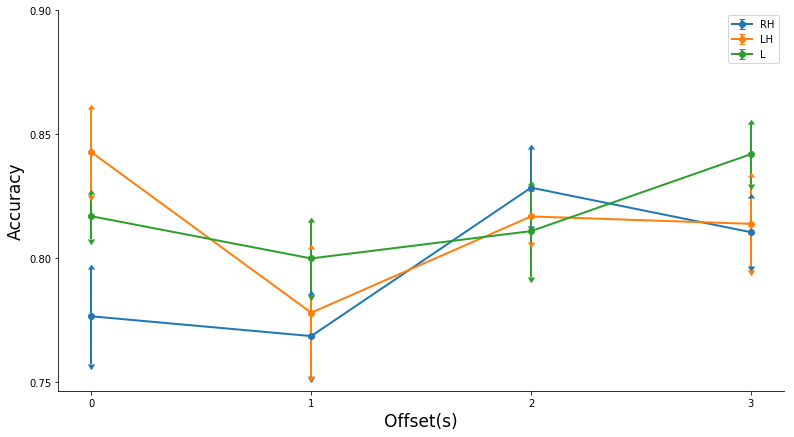

In [48]:
offset_vals = [0, 1, 2, 3]

plt.figure(figsize=(13,7))
plt.errorbar(offset_vals, max_accs_rh['Overall accuracy'].values, yerr=std_errs_rh, fmt='-o', uplims=True, lolims=True, lw=2)
plt.errorbar(offset_vals, max_accs_lh['Overall accuracy'].values, yerr=std_errs_lh, fmt='-o', uplims=True, lolims=True, lw=2)
plt.errorbar(offset_vals, max_accs_l['Overall accuracy'].values, yerr=std_errs_l, fmt='-o', uplims=True, lolims=True, lw=2)
plt.legend(['RH', 'LH', 'L'])
plt.xticks(offset_vals)
plt.yticks(np.arange(0.75, 0.901, 0.05))
plt.xlabel('Offset(s)', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)

plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)


#plt.grid()

plt.savefig('./results/graphs_etc/PP_PNP_max_acc_over_time_err_no_grid.jpg', bbox_inches='tight')
plt.savefig('./results/graphs_etc/PP_PNP_max_acc_over_time_err_no_grid.eps', bbox_inches='tight')

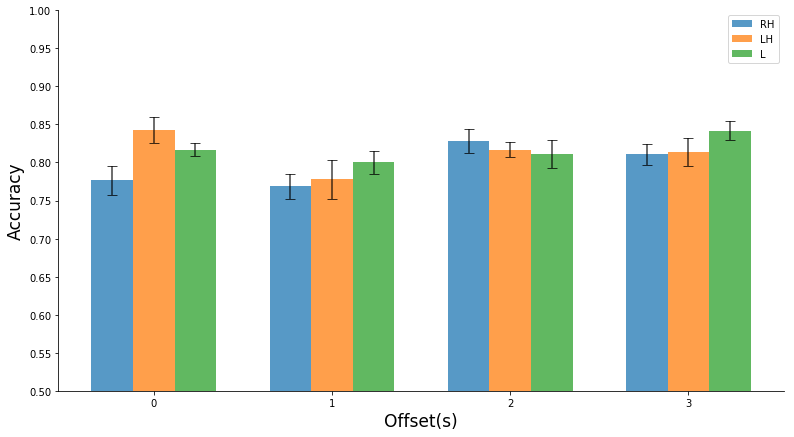

In [49]:
N = 3 # number of conditions


total_width = 0.7
width = total_width/N

labels = ['RH', 'LH', 'L']
ys = [max_accs_rh['Overall accuracy'].values, max_accs_lh['Overall accuracy'].values, max_accs_l['Overall accuracy'].values]
yerrs = [std_errs_rh, std_errs_lh, std_errs_l]

plt.figure(figsize=(13,7))


for i in range(N):

    plt.bar(np.array(offset_vals)+-0.5+(1-total_width)/2+(i+0.5)*width,
            ys[i],
            yerr=yerrs[i],
            width=width,
            align='center',
            alpha=0.75,
            label = labels[i],
            capsize=5, error_kw={'alpha':0.75})

plt.legend()

plt.xticks(offset_vals)
plt.yticks(np.arange(0.5,1.01,0.05))

plt.ylim([0.5,1])

plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)

plt.xlabel('Offset(s)', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)

#plt.grid()

plt.savefig('./results/graphs_etc/PP_PNP_max_acc_over_time_bars_err_no_grid.jpg', bbox_inches='tight')
plt.savefig('./results/graphs_etc/PP_PNP_max_acc_over_time_bars_err_no_grid.eps', bbox_inches='tight')